**Import Required Modules**

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import itertools
%matplotlib inline

**Input Data**

In [ ]:
movie_data = pd.read_csv('IMDB-Movie-Data.csv')
movie_data.Genre = movie_data.Genre.str.split(',')
movie_data.Actors = movie_data.Actors.str.split(', |,')
# movie_data = movie_data.nlargest(100, 'Revenue (Millions)')
movie_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"[Adventure, Mystery, Sci-Fi]","Following clues to the origin of mankind, a te...",Ridley Scott,"[Noomi Rapace, Logan Marshall-Green, Michael F...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"[Horror, Thriller]",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"[James McAvoy, Anya Taylor-Joy, Haley Lu Richa...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"[Animation, Comedy, Family]","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"[Matthew McConaughey, Reese Witherspoon, Seth ...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"[Action, Adventure, Fantasy]",A secret government agency recruits some of th...,David Ayer,"[Will Smith, Jared Leto, Margot Robbie, Viola ...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"[Crime, Drama, Mystery]","A tight-knit team of rising investigators, alo...",Billy Ray,"[Chiwetel Ejiofor, Nicole Kidman, Julia Robert...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,[Horror],Three American college students studying abroa...,Eli Roth,"[Lauren German, Heather Matarazzo, Bijou Phill...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"[Drama, Music, Romance]",Romantic sparks occur between two dance studen...,Jon M. Chu,"[Robert Hoffman, Briana Evigan, Cassie Ventura...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"[Adventure, Comedy]",A pair of friends embark on a mission to reuni...,Scot Armstrong,"[Adam Pally, T.J. Miller, Thomas Middleditch, ...",2014,93,5.6,4881,NaN,22.0


**Creating a actor's relation network**

1985


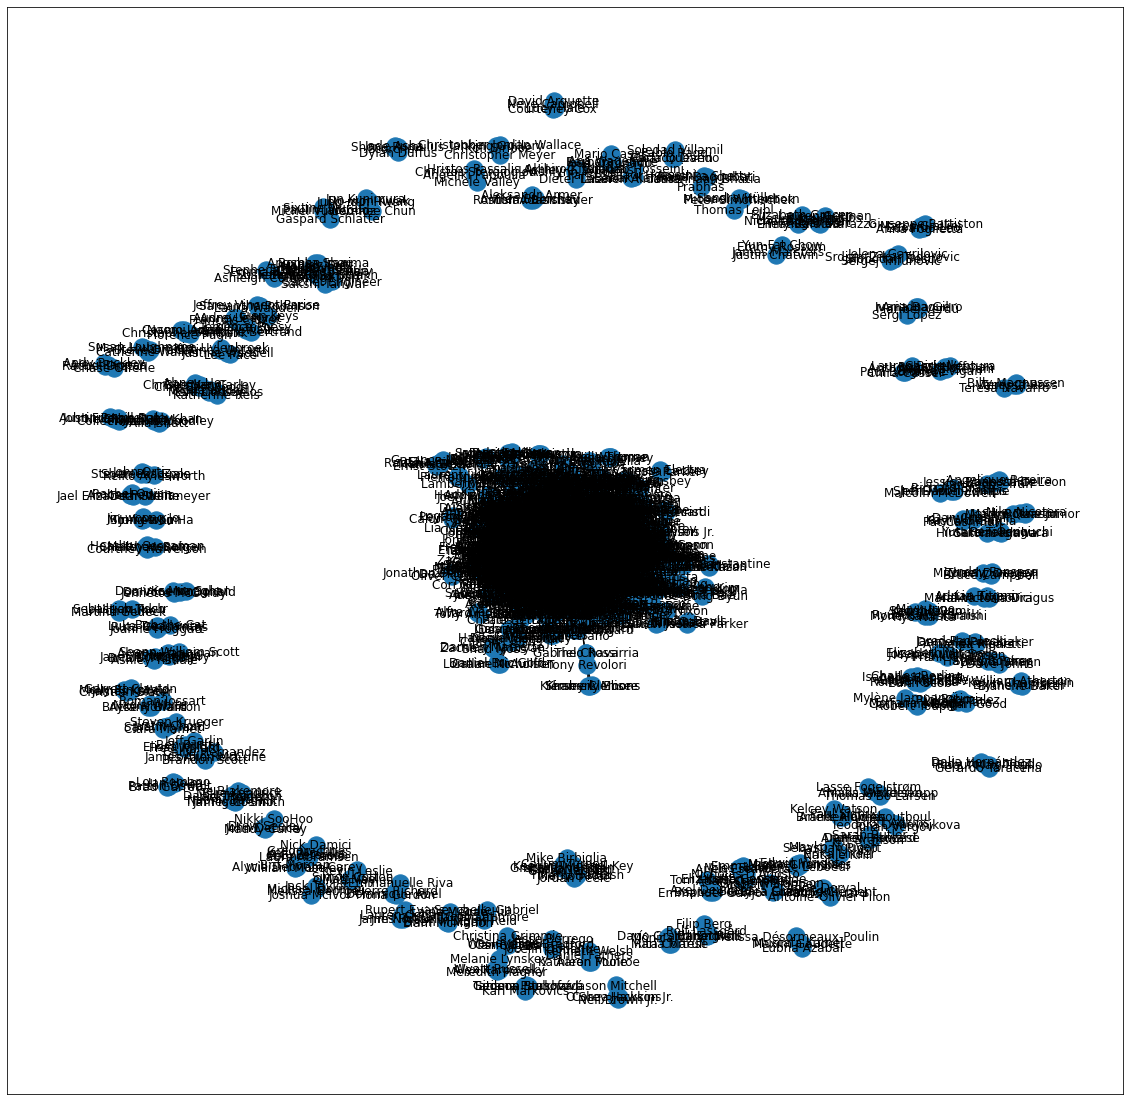

In [ ]:
#creating a set of actors from the data
actors = []
for actor in movie_data.Actors:
  for act in actor :
    actors.append(act)
actors=set(actors)
print(len(actors))
actor_temp={}
for actor in actors:
  actor_temp[actor]=[]
# print(actor_temp)
actor_temp2={}
for actor in actors:
  actor_temp2[actor]=[]
actors_graph=nx.Graph()
for actor in actors:
  actors_graph.add_node(actor)
i=0
for acts in movie_data.Actors:
  for act in acts:
    actor_temp[act].append(movie_data.Title[i])
    for actt in acts:
      if(act!=actt):
        actors_graph.add_edge(act,actt)
        actor_temp2[act].append(actt)
        actor_temp2[actt].append(act)
        
  i+=1
# print(actor_temp2)
plt.figure(figsize=(20,20))
nx.draw_networkx(actors_graph);




**Creating a genre's relation network**

{'History': ['Hidden Figures', 'Hacksaw Ridge', 'The Founder', 'Silence', 'Patriots Day', 'The Promise', '12 Years a Slave', 'Woman in Gold', '13 Hours', 'Spotlight', 'Jackie', 'Straight Outta Compton', 'Zodiac', 'There Will Be Blood', 'Lincoln', 'Bridge of Spies', 'Zero Dark Thirty', 'Marie Antoinette', 'Argo', 'Anthropoid', 'Viking', 'The Finest Hours', 'Frantz', 'The Hurt Locker', 'Lída Baarová', 'USS Indianapolis: Men of Courage', 'The Stanford Prison Experiment', 'The Other Boleyn Girl', 'Selma'], 'Drama': ['La La Land', 'Passengers', 'Hidden Figures', 'Colossal', 'Hacksaw Ridge', 'Lion', 'Arrival', 'Gold', 'Manchester by the Sea', 'Hounds of Love', 'Bahubali: The Beginning', "Assassin's Creed", 'Nocturnal Animals', 'Interstellar', '5- 25- 77', 'Moonlight', 'The Founder', 'Lowriders', 'Miss Sloane', 'Fallen', 'The Last Face', "Mother's Day", 'The Dark Knight', 'Silence', 'Me Before You', 'Their Finest', 'Sully', 'The Girl on the Train', 'Fifty Shades of Grey', 'The Prestige', 'Pat

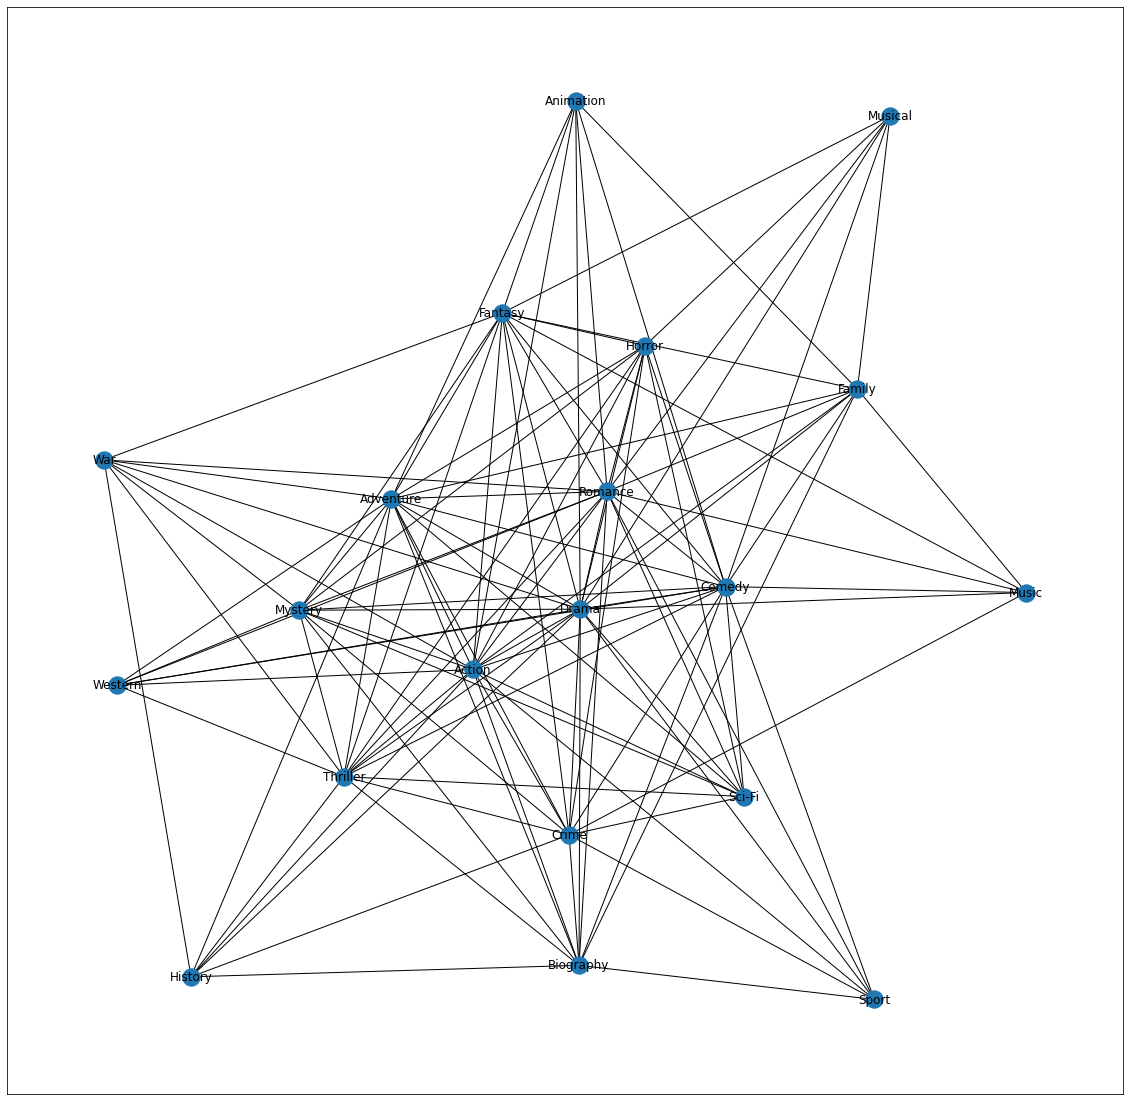

In [ ]:
#creating a set of genres from the data
genres = []
for genre in movie_data.Genre:
  for gen in genre :
    genres.append(gen)
genres=set(genres)
genre_temp={}
for genre in genres:
  genre_temp[genre]=[]
# print(genre_temp)
genres_graph=nx.Graph()
for genre in genres:
  genres_graph.add_node(genre)
i=0
for gens in movie_data.Genre:
  for gen in gens:
    genre_temp[gen].append(movie_data.Title[i])
    for gent in gens:
      if(gen!=gent):
        genres_graph.add_edge(gen,gent)
  i+=1
print(genre_temp)
plt.figure(figsize=(20,20))
nx.draw_networkx(genres_graph);



**Creating a movie's relation network**

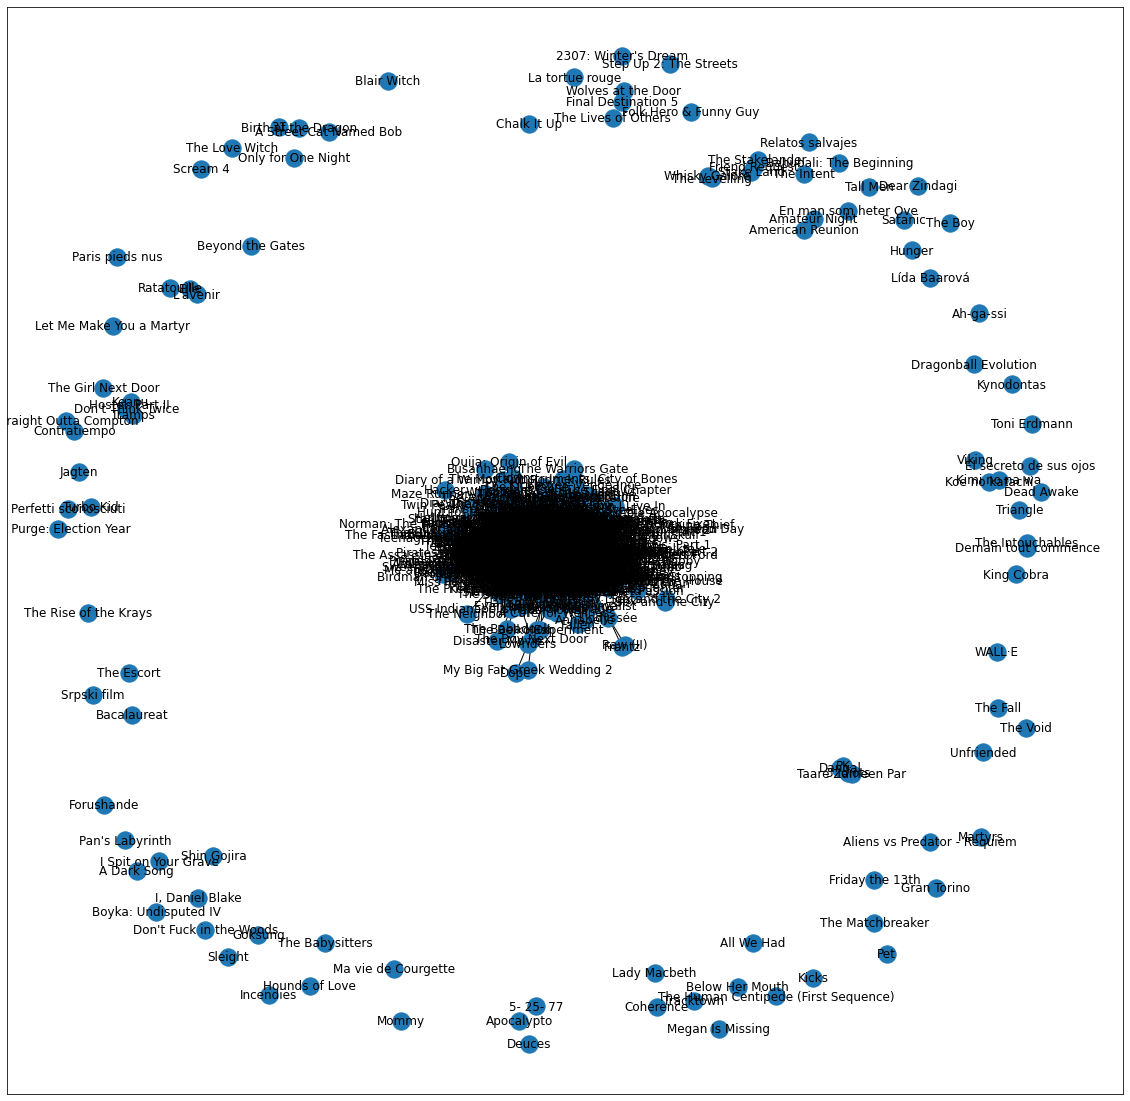

In [ ]:
movies = []
for movie in movie_data.Title:
  movies.append(movie)
movie_temp={}
for movie in movies:
  movie_temp[movie]=[]
movies_graph=nx.Graph()
for movie in movies:
  movies_graph.add_node(movie)
for acts in actor_temp:
    movie_temp=actor_temp[acts]
    for mov in movie_temp:
      for movt in movie_temp:
        if(mov!=movt):
          movies_graph.add_edge(mov,movt)
plt.figure(figsize=(20,20))
nx.draw_networkx(movies_graph);

In [ ]:
#1.The average number of actors one actor has played with(degree of the nodes)?
s=0
for i in (actors_graph.nodes):
  print("degree of node", i ,"->", nx.degree(actors_graph, i))
  s += nx.degree(actors_graph, i)


degree of node Cam Gigandet -> 6
degree of node Jeff Kahn -> 3
degree of node Brooke Shields -> 3
degree of node Briana Evigan -> 3
degree of node Fran Kranz -> 3
degree of node Cate Blanchett -> 32
degree of node Ben Barnes -> 3
degree of node Lukas Hassel -> 3
degree of node Liam Neeson -> 26
degree of node Kim Coates -> 3
degree of node Eddie Redmayne -> 12
degree of node Cillian Murphy -> 18
degree of node Alden Ehrenreich -> 6
degree of node Anton Yelchin -> 6
degree of node Dean Mumford -> 3
degree of node Christopher Mintz-Plasse -> 12
degree of node Bryan Greenberg -> 3
degree of node Anthony Hopkins -> 15
degree of node Jamal Woolard -> 3
degree of node Mark Huberman -> 3
degree of node Mackenzie Foy -> 3
degree of node Charlotte Gainsbourg -> 15
degree of node Jane Lynch -> 3
degree of node Gregory Jones -> 3
degree of node Jon Daly -> 3
degree of node T.I. -> 3
degree of node Richard Madden -> 6
degree of node Wendi McLendon-Covey -> 6
degree of node Steven Pasquale -> 3
deg

In [ ]:
print("average degree is" , s/len(actors_graph.nodes))

average degree is 5.7974811083123425


In [ ]:
# 2.Actors who have acted with the most other actors?
print(actors_graph.degree)
colaborativeActors = sorted(actors_graph.degree, key=lambda x: x[1], reverse=True)[:10]
for key,value in colaborativeActors:
  print(key," ",value)

[('Cam Gigandet', 6), ('Jeff Kahn', 3), ('Brooke Shields', 3), ('Briana Evigan', 3), ('Fran Kranz', 3), ('Cate Blanchett', 32), ('Ben Barnes', 3), ('Lukas Hassel', 3), ('Liam Neeson', 26), ('Kim Coates', 3), ('Eddie Redmayne', 12), ('Cillian Murphy', 18), ('Alden Ehrenreich', 6), ('Anton Yelchin', 6), ('Dean Mumford', 3), ('Christopher Mintz-Plasse', 12), ('Bryan Greenberg', 3), ('Anthony Hopkins', 15), ('Jamal Woolard', 3), ('Mark Huberman', 3), ('Mackenzie Foy', 3), ('Charlotte Gainsbourg', 15), ('Jane Lynch', 3), ('Gregory Jones', 3), ('Jon Daly', 3), ('T.I.', 3), ('Richard Madden', 6), ('Wendi McLendon-Covey', 6), ('Steven Pasquale', 3), ('Jack McBrayer', 3), ('Vilen Babichev', 3), ('Yu-mi Jung', 3), ('Charles Dance', 3), ('Joan Allen', 9), ('Kevin Leslie', 3), ('Alfie Allen', 3), ('John C. Reilly', 16), ('Adrianne Palicki', 3), ('Ryan Potter', 3), ('Mary Steenburgen', 6), ('Bruce Willis', 12), ('Cosmo Jarvis', 3), ('Sarah Silverman', 6), ('Wyatt Russell', 3), ('Seth MacFarlane', 1

In [ ]:
print(movie_data.Director)  #director list

0                James Gunn
1              Ridley Scott
2        M. Night Shyamalan
3      Christophe Lourdelet
4                David Ayer
               ...         
995               Billy Ray
996                Eli Roth
997              Jon M. Chu
998          Scot Armstrong
999        Barry Sonnenfeld
Name: Director, Length: 1000, dtype: object


In [ ]:
# 3.director has directed the most films?
movie_data.Director.value_counts()[:10]

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Zack Snyder           5
Denis Villeneuve      5
Woody Allen           5
Peter Berg            5
Danny Boyle           5
Name: Director, dtype: int64

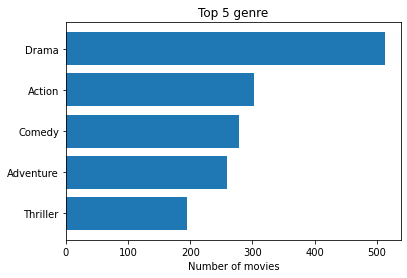

In [ ]:
#4.The most popular film genres  
genre_count = {}
#genre_temp is a dictionary with value as list which contains all movies in that genre
for genre in genres:
    genre_count[genre] = len(genre_temp[genre])
genre_count = sorted(genre_count.items(), key=lambda x: x[1])[-5:]
plt.title('Top 5 genre')
plt.xlabel("Number of movies")
plt.barh([val[0] for val in genre_count], [val[1] for val in genre_count])
plt.show()

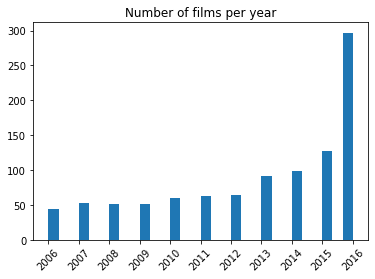

In [ ]:
#5.the film production Every year 
plt.title("Number of films per year")
plt.xticks(range(2006,2017),rotation=45)
plt.hist(movie_data.Year,30)
plt.show()

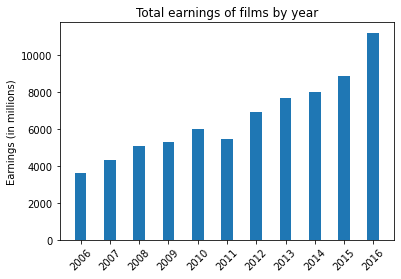

In [ ]:
#6.the total earnings Every year 
plt.title("Total earnings of films by year")
plt.xticks(range(2006,2017),rotation=45)
plt.ylabel("Earnings (in millions)")
plt.bar(range(2006,2017), movie_data.groupby(['Year'])['Revenue (Millions)'].sum(),0.4)
plt.show()

In [ ]:
#7.Top 10 rated movies 
movie_rated={}
i=0
for movie in movie_data.Title:
  movie_rated[movie]=movie_data.Rating[i]
  i+=1
movie_rated=sorted(movie_rated.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in movie_rated:
  print(key," => ",val)

The Dark Knight  =>  9.0
Inception  =>  8.8
Dangal  =>  8.8
Interstellar  =>  8.6
Kimi no na wa  =>  8.6
The Intouchables  =>  8.6
The Prestige  =>  8.5
The Departed  =>  8.5
The Dark Knight Rises  =>  8.5
Whiplash  =>  8.5


In [ ]:
#8.Top 10 most revenue generated movies
movie_earn={}
i=0
for movie in movie_data.Title:
  if not(math.isnan(movie_data['Revenue (Millions)'][i])) == True:
    movie_earn[movie]=movie_data['Revenue (Millions)'][i]
  i+=1
# print(movie_earn)
movie_earn=sorted(movie_earn.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in movie_earn:
  print(key," => ",val)

Star Wars: Episode VII - The Force Awakens  =>  936.63
Avatar  =>  760.51
Jurassic World  =>  652.18
The Avengers  =>  623.28
The Dark Knight  =>  533.32
Rogue One  =>  532.17
Finding Dory  =>  486.29
Avengers: Age of Ultron  =>  458.99
The Dark Knight Rises  =>  448.13
The Hunger Games: Catching Fire  =>  424.65


In [ ]:
#9 most worked actor in each genre
from collections import Counter
genre_actors={}
for genre in genres:
  genre_actors[genre]=[]
i=0 
for gens in movie_data.Genre:
  for gen in gens:
    for act in movie_data.Actors[i]:
      genre_actors[gen].append(act)
  i+=1
for key in genre_actors:
  temp_dic=Counter(genre_actors[key])
  temp_dic=dict(sorted(temp_dic.items(), key =
             lambda kv:(int(kv[1]), kv[0]),reverse=True))
  print(key,"=>",list(temp_dic.keys())[0])

History => Natalie Portman
Drama => Christian Bale
Fantasy => Johnny Depp
Thriller => Matt Damon
Animation => Angelina Jolie
Action => Robert Downey Jr.
Comedy => Seth Rogen
Mystery => Vera Farmiga
Horror => Patrick Wilson
Crime => Ryan Gosling
Romance => Anna Kendrick
Music => Rebel Wilson
Adventure => Robert Downey Jr.
Biography => Christian Bale
Sci-Fi => Scarlett Johansson
Musical => Amanda Seyfried
Family => Zachary Gordon
War => Brad Pitt
Sport => Sylvester Stallone
Western => William Fichtner


In [ ]:
#10.The density of the all network's?
print("actors_graph ==",nx.density(actors_graph))

print("genres_graph ==",nx.density(genres_graph))

actors_graph == 0.0029221174941090437
genres_graph == 0.6


In [ ]:
#11.clustering coeffiecient of graph
for i in (actors_graph.nodes):
  print("clustering of node" , i , "->", nx.clustering(actors_graph, i))

nx.average_clustering(actors_graph)


clustering of node Cam Gigandet -> 0.4
clustering of node Jeff Kahn -> 1.0
clustering of node Brooke Shields -> 1.0
clustering of node Briana Evigan -> 1.0
clustering of node Fran Kranz -> 1.0
clustering of node Cate Blanchett -> 0.07661290322580645
clustering of node Ben Barnes -> 1.0
clustering of node Lukas Hassel -> 1.0
clustering of node Liam Neeson -> 0.09230769230769231
clustering of node Kim Coates -> 1.0
clustering of node Eddie Redmayne -> 0.18181818181818182
clustering of node Cillian Murphy -> 0.13725490196078433
clustering of node Alden Ehrenreich -> 0.4
clustering of node Anton Yelchin -> 0.4
clustering of node Dean Mumford -> 1.0
clustering of node Christopher Mintz-Plasse -> 0.21212121212121213
clustering of node Bryan Greenberg -> 1.0
clustering of node Anthony Hopkins -> 0.1619047619047619
clustering of node Jamal Woolard -> 1.0
clustering of node Mark Huberman -> 1.0
clustering of node Mackenzie Foy -> 1.0
clustering of node Charlotte Gainsbourg -> 0.1523809523809524

0.7563543951201911

In [ ]:
degree_values=dict(nx.degree(actors_graph)).values()
unique_deg=list(set(degree_values))
degree_value=list(degree_values)
count_deg=[]
for i in unique_deg:
  x=degree_value.count(i)
  count_deg.append(x)
print(count_deg)


[1, 1300, 11, 19, 244, 6, 17, 115, 10, 12, 61, 3, 14, 36, 8, 18, 22, 7, 5, 15, 6, 7, 7, 3, 5, 9, 7, 1, 3, 1, 3, 5, 2, 1, 1]


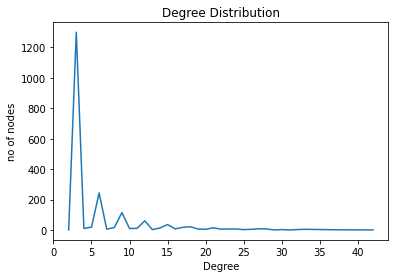

In [ ]:
#12.The degree distribution plot of the actors_graph
plt.plot(unique_deg,count_deg)
plt.xlabel('Degree')
plt.ylabel('no of nodes')
plt.title('Degree Distribution')
plt.show()

**Centrality Measures**

**Degree Centrality**

In [ ]:
deg_centrality=nx.degree_centrality(actors_graph)
print(deg_centrality)

{'Cam Gigandet': 0.0030241935483870967, 'Jeff Kahn': 0.0015120967741935483, 'Brooke Shields': 0.0015120967741935483, 'Briana Evigan': 0.0015120967741935483, 'Fran Kranz': 0.0015120967741935483, 'Cate Blanchett': 0.016129032258064516, 'Ben Barnes': 0.0015120967741935483, 'Lukas Hassel': 0.0015120967741935483, 'Liam Neeson': 0.013104838709677418, 'Kim Coates': 0.0015120967741935483, 'Eddie Redmayne': 0.006048387096774193, 'Cillian Murphy': 0.00907258064516129, 'Alden Ehrenreich': 0.0030241935483870967, 'Anton Yelchin': 0.0030241935483870967, 'Dean Mumford': 0.0015120967741935483, 'Christopher Mintz-Plasse': 0.006048387096774193, 'Bryan Greenberg': 0.0015120967741935483, 'Anthony Hopkins': 0.007560483870967742, 'Jamal Woolard': 0.0015120967741935483, 'Mark Huberman': 0.0015120967741935483, 'Mackenzie Foy': 0.0015120967741935483, 'Charlotte Gainsbourg': 0.007560483870967742, 'Jane Lynch': 0.0015120967741935483, 'Gregory Jones': 0.0015120967741935483, 'Jon Daly': 0.0015120967741935483, 'T.I

In [ ]:
top_deg=sorted(deg_centrality.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in top_deg:
  print(key,"=>",val)

Mark Wahlberg => 0.021169354838709676
Hugh Jackman => 0.02066532258064516
Brad Pitt => 0.018649193548387098
Christian Bale => 0.018649193548387098
Anne Hathaway => 0.01663306451612903
Michael Fassbender => 0.01663306451612903
Tom Hardy => 0.01663306451612903
Jake Gyllenhaal => 0.01663306451612903
Channing Tatum => 0.01663306451612903
Cate Blanchett => 0.016129032258064516


**Betweenness Centrality**

In [ ]:
bet_centrality=nx.betweenness_centrality(actors_graph)
print(bet_centrality)

{'Cam Gigandet': 0.00031818871369800874, 'Jeff Kahn': 0.0, 'Brooke Shields': 0.0, 'Briana Evigan': 0.0, 'Fran Kranz': 0.0, 'Cate Blanchett': 0.011593000682912634, 'Ben Barnes': 0.0, 'Lukas Hassel': 0.0, 'Liam Neeson': 0.01172761866734336, 'Kim Coates': 0.0, 'Eddie Redmayne': 0.002504386523259029, 'Cillian Murphy': 0.007059613752356555, 'Alden Ehrenreich': 0.0007282182853614071, 'Anton Yelchin': 0.0003465905408949467, 'Dean Mumford': 0.0, 'Christopher Mintz-Plasse': 0.0019001040077490756, 'Bryan Greenberg': 0.0, 'Anthony Hopkins': 0.0038783411902244807, 'Jamal Woolard': 0.0, 'Mark Huberman': 0.0, 'Mackenzie Foy': 0.0, 'Charlotte Gainsbourg': 0.0032615231552154396, 'Jane Lynch': 0.0, 'Gregory Jones': 0.0, 'Jon Daly': 0.0, 'T.I.': 0.0, 'Richard Madden': 0.0004594466869252693, 'Wendi McLendon-Covey': 0.0005008759467683626, 'Steven Pasquale': 0.0, 'Jack McBrayer': 0.0, 'Vilen Babichev': 0.0, 'Yu-mi Jung': 0.0, 'Charles Dance': 0.0, 'Joan Allen': 0.0009520936986774321, 'Kevin Leslie': 0.0, '

In [ ]:
top_bet=sorted(bet_centrality.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in top_bet:
  print(key,"=>",val)

Mark Wahlberg => 0.026482896780064435
Channing Tatum => 0.025788127210341887
Christian Bale => 0.02254736598250681
Hugh Jackman => 0.020767781714828903
Charlize Theron => 0.017552710060818474
Sharlto Copley => 0.016524995617116647
Matthew McConaughey => 0.016513517147245377
Tom Hardy => 0.01575256276205793
Brad Pitt => 0.015329372508813156
Chloë Grace Moretz => 0.015051277694188289


**Closeness Centrality**

In [ ]:
close_centrality=nx.closeness_centrality(actors_graph)
print(close_centrality)

{'Cam Gigandet': 0.18917252273604684, 'Jeff Kahn': 0.19184633931182132, 'Brooke Shields': 0.1929133048942755, 'Briana Evigan': 0.0015120967741935483, 'Fran Kranz': 0.18679548580114363, 'Cate Blanchett': 0.2430377233516242, 'Ben Barnes': 0.1947789459648487, 'Lukas Hassel': 0.15458378590995855, 'Liam Neeson': 0.23972505712817144, 'Kim Coates': 0.15875004100948958, 'Eddie Redmayne': 0.2163048367539659, 'Cillian Murphy': 0.23903671948327815, 'Alden Ehrenreich': 0.21154122015596227, 'Anton Yelchin': 0.2074298708605723, 'Dean Mumford': 0.18665587781474516, 'Christopher Mintz-Plasse': 0.22580973283555972, 'Bryan Greenberg': 0.19214153294055164, 'Anthony Hopkins': 0.23498829931890197, 'Jamal Woolard': 0.1769488199774189, 'Mark Huberman': 0.0015120967741935483, 'Mackenzie Foy': 0.20871265628959473, 'Charlotte Gainsbourg': 0.21563250260415215, 'Jane Lynch': 0.17150498868021496, 'Gregory Jones': 0.0024813895781637717, 'Jon Daly': 0.18828827240359547, 'T.I.': 0.19009405123772952, 'Richard Madden':

In [ ]:
top_close=sorted(close_centrality.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in top_close:
  print(key,"=>",val)

Christian Bale => 0.2648977137421818
Mark Wahlberg => 0.25773536069775954
Brad Pitt => 0.2555726202580117
Charlize Theron => 0.2538064680041962
Hugh Jackman => 0.2532402803854482
Matt Damon => 0.25211544974371997
Anna Kendrick => 0.2518611985842366
Leonardo DiCaprio => 0.2516581665821534
Anne Hathaway => 0.2510005673528935
Josh Brolin => 0.2505975963436976


**Eigenvector_centrality**

In [ ]:
eigen_centrality=nx.eigenvector_centrality(actors_graph)
print(eigen_centrality)

{'Cam Gigandet': 0.006615046277066137, 'Jeff Kahn': 0.01056270126270536, 'Brooke Shields': 0.0077249013447968, 'Briana Evigan': 1.9098732157199395e-12, 'Fran Kranz': 0.006965318252962507, 'Cate Blanchett': 0.09331803126143338, 'Ben Barnes': 0.012637592157718912, 'Lukas Hassel': 0.0006530249613146453, 'Liam Neeson': 0.06302050691535978, 'Kim Coates': 0.0009626947275776454, 'Eddie Redmayne': 0.021710328909978018, 'Cillian Murphy': 0.06331096478572479, 'Alden Ehrenreich': 0.022999663778487094, 'Anton Yelchin': 0.021681342223414786, 'Dean Mumford': 0.00796386263931182, 'Christopher Mintz-Plasse': 0.03953601644416471, 'Bryan Greenberg': 0.011725484143665647, 'Anthony Hopkins': 0.055021460745675425, 'Jamal Woolard': 0.004111761368865457, 'Mark Huberman': 1.9098732157199395e-12, 'Mackenzie Foy': 0.023368514700307846, 'Charlotte Gainsbourg': 0.02546369582069047, 'Jane Lynch': 0.0024955442356241965, 'Gregory Jones': 2.0894286473481329e-10, 'Jon Daly': 0.007767419770379526, 'T.I.': 0.00673928760

In [ ]:
top_eigen=sorted(bet_centrality.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in top_eigen:
  print(key,"=>",val)

Mark Wahlberg => 0.026482896780064435
Channing Tatum => 0.025788127210341887
Christian Bale => 0.02254736598250681
Hugh Jackman => 0.020767781714828903
Charlize Theron => 0.017552710060818474
Sharlto Copley => 0.016524995617116647
Matthew McConaughey => 0.016513517147245377
Tom Hardy => 0.01575256276205793
Brad Pitt => 0.015329372508813156
Chloë Grace Moretz => 0.015051277694188289


**Link Prediction**

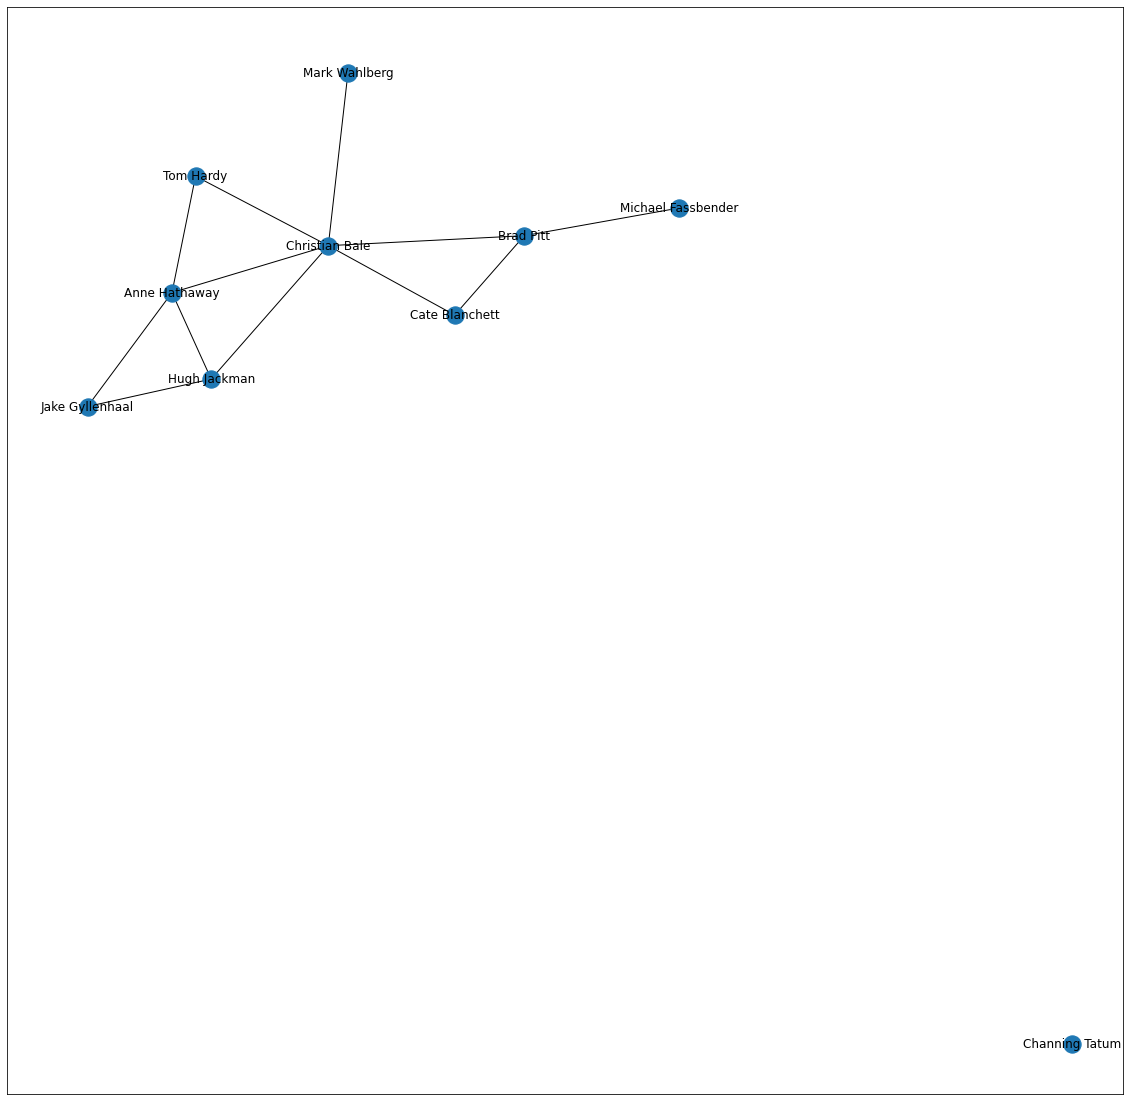

In [ ]:
# created a graph from the top colaborative_actors
pactors_graph=nx.Graph()
temp=[]
for actor in colaborativeActors:
  pactors_graph.add_node(actor[0])
  temp.append(actor[0])
# print(actor_temp2)
for act in temp:
  for ele in actor_temp2[act]:
    if ele in temp and ele!=act:
      pactors_graph.add_edge(ele,act)

plt.figure(figsize=(20,20))
nx.draw_networkx(pactors_graph);

**Jaccard_coefficient**

In [ ]:
temp_list=list(nx.jaccard_coefficient(pactors_graph))
temp_list.sort(key = lambda x: x[-1])
temp_list=(temp_list)[::-1]
for ele in temp_list:
  print(str(ele[0])+",",str(ele[1])+",",str(ele[-1]))

Hugh Jackman, Tom Hardy, 0.6666666666666666
Tom Hardy, Mark Wahlberg, 0.5
Cate Blanchett, Michael Fassbender, 0.5
Cate Blanchett, Mark Wahlberg, 0.5
Jake Gyllenhaal, Christian Bale, 0.3333333333333333
Tom Hardy, Jake Gyllenhaal, 0.3333333333333333
Hugh Jackman, Mark Wahlberg, 0.3333333333333333
Cate Blanchett, Tom Hardy, 0.3333333333333333
Brad Pitt, Mark Wahlberg, 0.3333333333333333
Cate Blanchett, Hugh Jackman, 0.25
Brad Pitt, Tom Hardy, 0.25
Anne Hathaway, Mark Wahlberg, 0.25
Brad Pitt, Hugh Jackman, 0.2
Anne Hathaway, Cate Blanchett, 0.2
Michael Fassbender, Christian Bale, 0.16666666666666666
Anne Hathaway, Brad Pitt, 0.16666666666666666
Michael Fassbender, Jake Gyllenhaal, 0.0
Mark Wahlberg, Michael Fassbender, 0.0
Mark Wahlberg, Jake Gyllenhaal, 0.0
Tom Hardy, Michael Fassbender, 0.0
Channing Tatum, Michael Fassbender, 0.0
Channing Tatum, Mark Wahlberg, 0.0
Channing Tatum, Tom Hardy, 0.0
Channing Tatum, Christian Bale, 0.0
Channing Tatum, Jake Gyllenhaal, 0.0
Hugh Jackman, Michae

**Resource** **Allocation** 

In [ ]:
temp_list=list(nx.resource_allocation_index(pactors_graph))
temp_list.sort(key = lambda x: x[-1])
temp_list=(temp_list)[::-1]
for ele in temp_list:
  print(str(ele[0])+",",str(ele[1])+",",str(ele[-1]))
# print(temp_list)

Jake Gyllenhaal, Christian Bale, 0.5833333333333333
Hugh Jackman, Tom Hardy, 0.41666666666666663
Michael Fassbender, Christian Bale, 0.3333333333333333
Cate Blanchett, Michael Fassbender, 0.3333333333333333
Tom Hardy, Jake Gyllenhaal, 0.25
Tom Hardy, Mark Wahlberg, 0.16666666666666666
Hugh Jackman, Mark Wahlberg, 0.16666666666666666
Cate Blanchett, Mark Wahlberg, 0.16666666666666666
Cate Blanchett, Tom Hardy, 0.16666666666666666
Cate Blanchett, Hugh Jackman, 0.16666666666666666
Brad Pitt, Mark Wahlberg, 0.16666666666666666
Brad Pitt, Tom Hardy, 0.16666666666666666
Brad Pitt, Hugh Jackman, 0.16666666666666666
Anne Hathaway, Mark Wahlberg, 0.16666666666666666
Anne Hathaway, Brad Pitt, 0.16666666666666666
Anne Hathaway, Cate Blanchett, 0.16666666666666666
Michael Fassbender, Jake Gyllenhaal, 0
Mark Wahlberg, Michael Fassbender, 0
Mark Wahlberg, Jake Gyllenhaal, 0
Tom Hardy, Michael Fassbender, 0
Channing Tatum, Michael Fassbender, 0
Channing Tatum, Mark Wahlberg, 0
Channing Tatum, Tom Har

**Adamic_adar**

In [ ]:
temp_list=list(nx.adamic_adar_index(pactors_graph))
temp_list.sort(key = lambda x: x[-1])
temp_list=(temp_list)[::-1]
for ele in temp_list:
  print(str(ele[0])+",",str(ele[1])+",",str(ele[-1]))

Jake Gyllenhaal, Christian Bale, 1.631586747071319
Hugh Jackman, Tom Hardy, 1.279458146995729
Michael Fassbender, Christian Bale, 0.9102392266268373
Cate Blanchett, Michael Fassbender, 0.9102392266268373
Tom Hardy, Jake Gyllenhaal, 0.7213475204444817
Tom Hardy, Mark Wahlberg, 0.5581106265512472
Hugh Jackman, Mark Wahlberg, 0.5581106265512472
Cate Blanchett, Mark Wahlberg, 0.5581106265512472
Cate Blanchett, Tom Hardy, 0.5581106265512472
Cate Blanchett, Hugh Jackman, 0.5581106265512472
Brad Pitt, Mark Wahlberg, 0.5581106265512472
Brad Pitt, Tom Hardy, 0.5581106265512472
Brad Pitt, Hugh Jackman, 0.5581106265512472
Anne Hathaway, Mark Wahlberg, 0.5581106265512472
Anne Hathaway, Brad Pitt, 0.5581106265512472
Anne Hathaway, Cate Blanchett, 0.5581106265512472
Michael Fassbender, Jake Gyllenhaal, 0
Mark Wahlberg, Michael Fassbender, 0
Mark Wahlberg, Jake Gyllenhaal, 0
Tom Hardy, Michael Fassbender, 0
Channing Tatum, Michael Fassbender, 0
Channing Tatum, Mark Wahlberg, 0
Channing Tatum, Tom Har

**Preferential_attachment**

In [ ]:
temp_list=list(nx.preferential_attachment(pactors_graph))
temp_list.sort(key = lambda x: x[-1])
temp_list=(temp_list)[::-1]
for ele in temp_list:
  print(str(ele[0])+",",str(ele[1])+",",str(ele[-1]))

Jake Gyllenhaal, Christian Bale, 12
Anne Hathaway, Brad Pitt, 12
Brad Pitt, Hugh Jackman, 9
Anne Hathaway, Cate Blanchett, 8
Michael Fassbender, Christian Bale, 6
Hugh Jackman, Tom Hardy, 6
Cate Blanchett, Hugh Jackman, 6
Brad Pitt, Jake Gyllenhaal, 6
Brad Pitt, Tom Hardy, 6
Tom Hardy, Jake Gyllenhaal, 4
Cate Blanchett, Jake Gyllenhaal, 4
Cate Blanchett, Tom Hardy, 4
Anne Hathaway, Michael Fassbender, 4
Anne Hathaway, Mark Wahlberg, 4
Hugh Jackman, Michael Fassbender, 3
Hugh Jackman, Mark Wahlberg, 3
Brad Pitt, Mark Wahlberg, 3
Michael Fassbender, Jake Gyllenhaal, 2
Mark Wahlberg, Jake Gyllenhaal, 2
Tom Hardy, Michael Fassbender, 2
Tom Hardy, Mark Wahlberg, 2
Cate Blanchett, Michael Fassbender, 2
Cate Blanchett, Mark Wahlberg, 2
Mark Wahlberg, Michael Fassbender, 1
Channing Tatum, Michael Fassbender, 0
Channing Tatum, Mark Wahlberg, 0
Channing Tatum, Tom Hardy, 0
Channing Tatum, Christian Bale, 0
Channing Tatum, Jake Gyllenhaal, 0
Hugh Jackman, Channing Tatum, 0
Cate Blanchett, Channin